# **Program 6**

Prepare a Lasso and Ridge regression model for prediction of house price and compare it with linear regression model.

Linear Regression Coefficients: [0.31039697 0.01959006 0.26477477 0.13658528 0.04098972 0.02376751
 0.04792801 0.07098812 0.05282266 0.07096655 0.04358941 0.03623753]
Lasso Regression Coefficients: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ridge Regression Coefficients: [0.30639084 0.02106921 0.26241647 0.13615958 0.04133038 0.02401481
 0.04774817 0.07051319 0.0530351  0.0713936  0.04377635 0.03640865]
Linear Regression Intercept: -0.0050427725675667445
Lasso Regression Intercept: 0.26192224608287595
Ridge Regression Intercept: -0.0048457449783638196
Linear Regression R^2 Score (Train): 0.6806547764599723
Lasso Regression R^2 Score (Train): 0.0
Ridge Regression R^2 Score (Train): 0.6806349211986238
MSE without regularization (Linear Regression): 0.010274158458096141
MSE with Lasso regularization: 0.03051838551799671
MSE with Ridge regularization: 0.010266744866035897


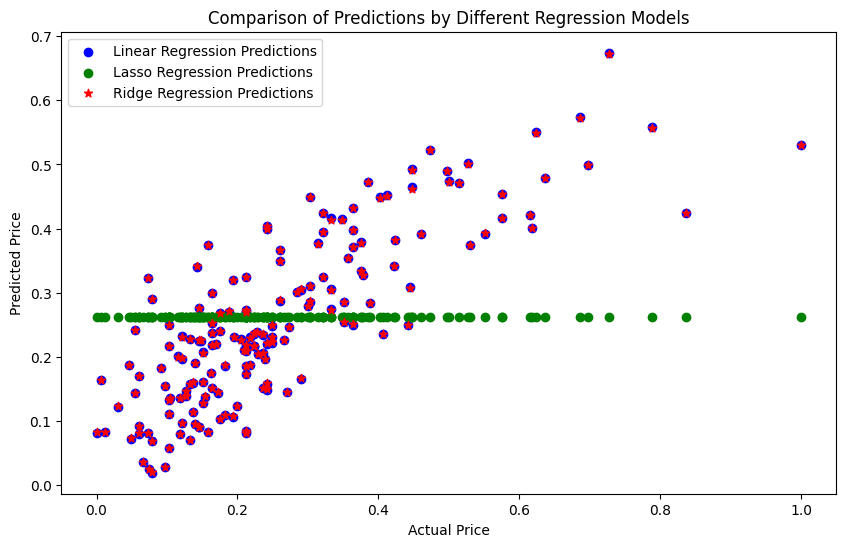

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Load the housing dataset
df = pd.read_csv('Housing.csv')

# convert categorical variables into numerical features that can be used by the model (target variable encoding)
df['mainroad']=df.groupby('mainroad')['price'].transform('mean')
df['guestroom']=df.groupby('guestroom')['price'].transform('mean')
df['basement']=df.groupby('basement')['price'].transform('mean')
df['hotwaterheating']=df.groupby('hotwaterheating')['price'].transform('mean')
df['airconditioning']=df.groupby('airconditioning')['price'].transform('mean')
df['prefarea']=df.groupby('prefarea')['price'].transform('mean')
df['furnishingstatus']=df.groupby('furnishingstatus')['price'].transform('mean')

# Normalize the dataset to bring all features to the same scale
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Define the target variable 'y' as 'median_house_value' and features 'x' by dropping the target column
y = df_normalized['price']
x = df_normalized.drop('price', axis=1)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Initialize models: Linear Regression, Lasso Regression, and Ridge Regression
model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)

# Fit each model to the training data
model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)

# Display model coefficients, intercepts and R^2 scores
print("Linear Regression Coefficients:", model.coef_)
print("Lasso Regression Coefficients:", lasso_model.coef_)
print("Ridge Regression Coefficients:", ridge_model.coef_)

print("Linear Regression Intercept:", model.intercept_)
print("Lasso Regression Intercept:", lasso_model.intercept_)
print("Ridge Regression Intercept:", ridge_model.intercept_)

print("Linear Regression R^2 Score (Train):", model.score(x_train, y_train))
print("Lasso Regression R^2 Score (Train):", lasso_model.score(x_train, y_train))
print("Ridge Regression R^2 Score (Train):", ridge_model.score(x_train, y_train))

# Predict the target values on the test set using each model
y_pred = model.predict(x_test)
y_pred_lasso = lasso_model.predict(x_test)
y_pred_ridge = ridge_model.predict(x_test)

# Calculate Mean Squared Error (MSE) for each model on the test set
mse = mean_squared_error(y_test, y_pred)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Display the MSE results to compare model performance, with lower MSE indicating better fit
print('MSE without regularization (Linear Regression):', mse)
print('MSE with Lasso regularization:', mse_lasso)
print('MSE with Ridge regularization:', mse_ridge)

# Visualize the comparison of actual vs predicted values for each model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label="Linear Regression Predictions")
plt.scatter(y_test, y_pred_lasso, color='green', label="Lasso Regression Predictions")
plt.scatter(y_test, y_pred_ridge, color='red', label="Ridge Regression Predictions", marker='*')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Comparison of Predictions by Different Regression Models")
plt.legend()
plt.show()